In [1]:
import numpy as np
import scipy as sp
from skimage import io
import matplotlib.pyplot as plt

In [2]:
raw_image = io.imread('data/campus.tiff')
raw_image

array([[283, 318, 290, ..., 291, 273, 296],
       [319, 288, 331, ..., 278, 294, 279],
       [290, 329, 295, ..., 286, 274, 293],
       ...,
       [302, 284, 306, ..., 328, 459, 331],
       [274, 306, 275, ..., 466, 355, 472],
       [306, 284, 305, ..., 330, 479, 330]],
      shape=(4040, 6064), dtype=uint16)

In [3]:
raw_image = raw_image.astype(np.float64)

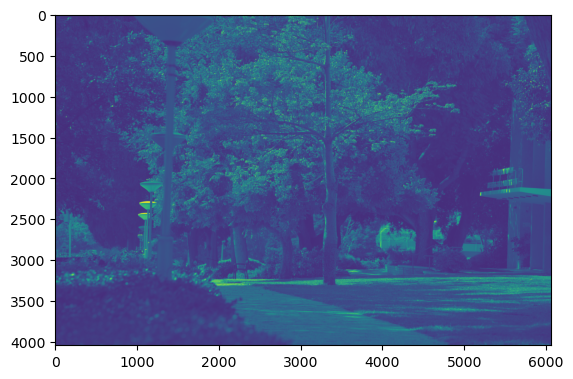

In [4]:
plt.imshow(np.log(raw_image))

## Adding RGB channels

For now the Bayer pattern is just a guess

In [5]:
raw_image_R = raw_image[0::2, 0::2]
raw_image_G0 = raw_image[0::2, 1::2]
raw_image_G1 = raw_image[1::2, 0::2]
raw_image_B = raw_image[1::2, 1::2]

In [6]:
im_rgb = np.dstack((raw_image_R, raw_image_G0, raw_image_B))

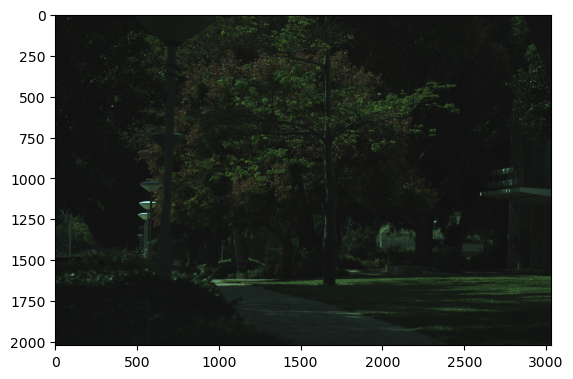

In [7]:
plt.imshow(im_rgb / np.max(im_rgb))

## White Balance

In [8]:
def gray_world(im):
    # normalize each channel by its average
    for start_x in [0,1]:
        for start_y in [0,1]:
            im[start_x::2, start_y::2] /= np.mean(im[start_x::2, start_y::2])
    
    im *= np.mean(im[0::2, 1::2])

gray_world(raw_image)

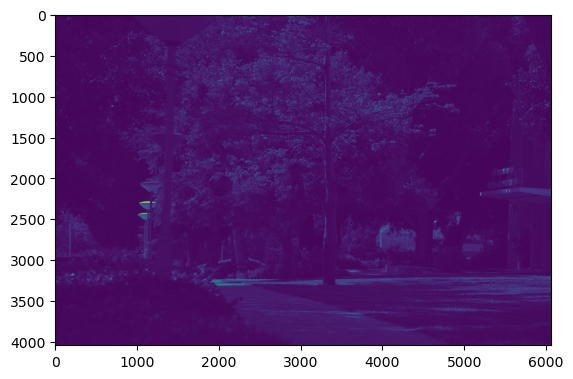

In [10]:
plt.imshow(raw_image / np.max(raw_image))

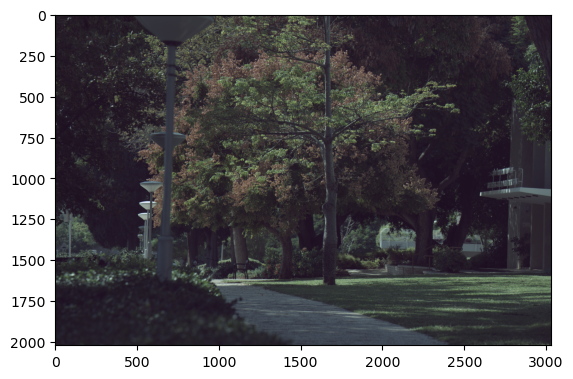

In [16]:
raw_image_R = raw_image[0::2, 0::2]
raw_image_G0 = raw_image[0::2, 1::2]
raw_image_G1 = raw_image[1::2, 0::2]
raw_image_B = raw_image[1::2, 1::2]

im_rgb = np.dstack((raw_image_R, raw_image_G0, raw_image_B))

to_plot = np.log(im_rgb) 
to_plot -= np.min(to_plot)
to_plot /= np.max(to_plot) 

plt.imshow(to_plot)